<a href="https://colab.research.google.com/github/akhilnooney/Akhil/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [2]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Write your code here

#Question 1.1
import pandas as pd
from gensim.models import Phrases
from gensim import corpora, models
from nltk.tokenize import word_tokenize 
df=pd.read_csv("/content/sample_data/reviews.csv")
tokens=[]
bigram = Phrases()
for a in df["clean_text"]:
  tokens.append(word_tokenize(a))
bigram = models.Phrases(tokens, min_count=1)
bigram_mod = models.phrases.Phraser(bigram)
trigram =models.Phrases(bigram[tokens])  
trigram_mod = models.phrases.Phraser(trigram)


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [4]:
#Top n-grams
import operator
dic={}
count=0
bigrams=[]
for id in range(len(tokens)):
    for token in bigram_mod[tokens[id]]:
        if '_' in token:
          bigrams.append(token)
for co in bigrams:
  if co in dic:
    dic[co]+=1
  else:
    dic[co]=1
bi= sorted(dic.items(),key=operator.itemgetter(1),reverse=True)
print(bi)

[('hard_drive', 5), ('touch_screen', 4), ('brand_new', 3), ('work_great', 3), ('ssd_one', 2), ('isnt_even', 2), ('would_buy', 2), ('microsoft_office', 2), ('loud_fan', 2), ('optical_drive', 2), ('price_good', 2), ('really_fast', 2), ('nice_screen', 2), ('fast_quiet', 2), ('best_laptop', 2), ('scammed_money', 2), ('one_month', 2), ('called_dell', 2), ('old_laptop', 2), ('super_fast', 2), ('dont_use', 2), ('work_perfectly', 2), ('work_well', 2), ('dell_best', 2), ('waste_money', 2), ('would_recommend', 2), ('warranty_expired', 2), ('difficult_see', 2), ('easy_use', 2), ('good_computer', 2), ('absolutely_love', 2), ('im_happy', 2), ('recommend_laptop', 1), ('laptop_upgrade', 1)]


In [5]:
#Dictionary Creation
id2word = corpora.Dictionary(bigram_mod[tokens])
print(id2word.token2id)
# Creating Bag-of-words
corpus = [id2word.doc2bow(text) for text in bigram_mod[tokens]]
print(corpus[:4])

{'access': 0, 'also': 1, 'balance': 2, 'bought': 3, 'cellphone': 4, 'comfortable': 5, 'computer': 6, 'critical': 7, 'data': 8, 'doesnt': 9, 'doeswe': 10, 'feel': 11, 'found': 12, 'fragile': 13, 'full': 14, 'gb': 15, 'good': 16, 'hdd': 17, 'including': 18, 'internal': 19, 'keyboard': 20, 'keypadthe': 21, 'laptop': 22, 'least': 23, 'like': 24, 'liked': 25, 'little': 26, 'look': 27, 'looking': 28, 'lot': 29, 'mac': 30, 'macbook': 31, 'modern': 32, 'nice': 33, 'number': 34, 'one': 35, 'price': 36, 'pro': 37, 'processor': 38, 'ram': 39, 'respond': 40, 'something': 41, 'spec': 42, 'ssd': 43, 'ssd_one': 44, 'storing': 45, 'tb': 46, 'thing': 47, 'touchscreen': 48, 'useful': 49, 'useless': 50, 'well': 51, 'wife': 52, 'windowsthis': 53, 'working': 54, 'absolute': 55, 'application': 56, 'bang': 57, 'barely': 58, 'best': 59, 'better': 60, 'boot': 61, 'bootup': 62, 'box': 63, 'breaking': 64, 'buck': 65, 'buying': 66, 'came': 67, 'chrome': 68, 'completely': 69, 'could': 70, 'cpu': 71, 'developer': 7

In [0]:
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [0]:
# Train LDA mode
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=4000,
                                           passes=10,
                                           alpha='auto',
                                           eta='auto',
                                           per_word_topics=True)

In [8]:
from pprint import pprint
pprint(lda_model.print_topics())
#To print the % of topics a document is
doc_lda = lda_model[corpus]

[(0,
  '0.029*"laptop" + 0.028*"fast" + 0.014*"good" + 0.014*"machine" + '
  '0.010*"error" + 0.009*"computer" + 0.008*"working" + 0.008*"bought" + '
  '0.008*"need" + 0.008*"fan"'),
 (1,
  '0.025*"laptop" + 0.010*"little" + 0.010*"still" + 0.009*"mbps" + '
  '0.009*"dell" + 0.009*"like" + 0.008*"would" + 0.008*"screen" + '
  '0.008*"speed" + 0.008*"product"'),
 (2,
  '0.036*"laptop" + 0.014*"dell" + 0.011*"quality" + 0.009*"used" + '
  '0.009*"new" + 0.008*"everything" + 0.008*"sure" + 0.008*"trackpad" + '
  '0.008*"finally" + 0.007*"ok"'),
 (3,
  '0.025*"laptop" + 0.016*"computer" + 0.015*"also" + 0.015*"feel" + '
  '0.013*"one" + 0.013*"like" + 0.012*"touchscreen" + 0.009*"fast" + '
  '0.009*"price" + 0.009*"good"'),
 (4,
  '0.026*"computer" + 0.013*"product" + 0.012*"happy" + 0.012*"laptop" + '
  '0.011*"absolutely_love" + 0.010*"one" + 0.010*"like" + 0.008*"issue" + '
  '0.008*"bought" + 0.008*"thing"'),
 (5,
  '0.026*"laptop" + 0.025*"dell" + 0.020*"fan" + 0.012*"like" + 0.010*"e

In [0]:
# Question 1.3

# Basically Weight of the keyword matters more in each topic so wehen we observe all the topics top weighted keyword is Laptop and computer.
# Topic 0: Basing on the keywords topic is about Laptop working fast
# Topic 1: Basing on the keywords topic is about Compter Network
# Topic 2: Basing on the keywords topic is about Laptop qulaity
# Topic 3: Basing on the keywords topic is about Computer Touch Screen
# Topic 4: Basing on the keywords topic is about User satisfaction about product
# Topic 5: Basing on the keywords topic is about Laptop fan problem and issue is not resolved by amazon services
# Topic 6: Basing on the keywords topic is about  Laptop is good but having issue with laptop speed
# Topic 7: Basing on the keywords topic is about User is fully satisfied with the product and with the price
# Topic 8: Basing on the keywords topic is about Laptop drive issue
# Topic 9: Basing on the keywords topic is about user love on laptop touch_screen,drive



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [10]:
#Question 2.1
from sklearn.feature_extraction.text import TfidfVectorizer
df=pd.read_csv("/content/sample_data/reviews.csv")
cv = TfidfVectorizer(max_features=300)
sentences=[]
for a in df["clean_text"]:
  sentences.append(a)
X = cv.fit_transform(sentences).toarray()
print(cv.get_feature_names())

['able', 'absolutely', 'advertised', 'agent', 'al', 'already', 'also', 'amazing', 'amazon', 'application', 'arrived', 'back', 'battery', 'best', 'better', 'beware', 'bit', 'boot', 'bootup', 'bought', 'box', 'brand', 'budget', 'buy', 'buying', 'called', 'came', 'cant', 'close', 'comfortable', 'complaint', 'completely', 'computer', 'cost', 'could', 'data', 'daughter', 'day', 'definitely', 'delivered', 'dell', 'description', 'didnt', 'difficult', 'display', 'doesnt', 'dont', 'drive', 'easy', 'el', 'else', 'enough', 'equipo', 'error', 'ethernet', 'even', 'everything', 'excellent', 'expected', 'expired', 'extra', 'fan', 'far', 'fast', 'feel', 'finally', 'find', 'fine', 'first', 'full', 'get', 'go', 'going', 'good', 'great', 'guarantee', 'half', 'happy', 'hard', 'havent', 'hdd', 'hear', 'heard', 'heat', 'heavy', 'hour', 'im', 'informed', 'inspiron', 'internet', 'isnt', 'issue', 'item', 'ive', 'key', 'keyboard', 'laptop', 'le', 'least', 'lemon', 'light', 'like', 'lit', 'literally', 'little', 

Above features are used for classifier models.
The max_features parameter passed in the TfidfVectorizer and it will pick out the top 300 features ordered by their term frequency but not by their Tf-idf score.
I have picked top 300 becuase it gives good precison and recall value.


**Neive-Bayes Model**

In [11]:
# Write your code here

#Question 2.2
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
df=pd.read_csv("/content/sample_data/reviews.csv")
cv = TfidfVectorizer(max_features=300)
sentences=[]
for a in df["clean_text"]:
  sentences.append(a)
X = cv.fit_transform(sentences).toarray()
#df5=pd.DataFrame(review_list,columns=['clean_text'],index=None)
df6=pd.DataFrame(X,columns=cv.get_feature_names())
df_final_tfidf=pd.merge(df,df6,left_index=True, right_index=True)
replace_sentiment={'Sentiment':{'Positive':1,'Negative':0,'Negitive':0,'Neutral':2}}
df1=df_final_tfidf.replace(replace_sentiment)
X=df1.iloc[:,3:].values
Y=df1['Sentiment'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=7)#Train,Test split
clf=naive_bayes.MultinomialNB()
clf.fit(X_train,Y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
y_predictions=clf.predict(X_test)
acc=accuracy_score(Y_test, y_predictions)
print(f"Accuracy : {round((acc)*100,2)}")

Accuracy : 81.25


In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_predictions)

array([[ 0,  2,  0],
       [ 0, 13,  0],
       [ 0,  1,  0]])

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(classification_report(Y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.81      1.00      0.90        13
           2       0.00      0.00      0.00         1

    accuracy                           0.81        16
   macro avg       0.27      0.33      0.30        16
weighted avg       0.66      0.81      0.73        16



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Bi-grams features**

In [36]:
df=pd.read_csv("/content/sample_data/reviews.csv")
vect = TfidfVectorizer(ngram_range=(1,2), binary=True, max_features=400)
TFIDF=vect.fit_transform(sentences).toarray()
df7=pd.DataFrame(TFIDF,columns=vect.get_feature_names())
df_final_tfidf=pd.merge(df,df7,left_index=True, right_index=True)
replace_sentiment={'Sentiment':{'Positive':1,'Negative':0,'Negitive':0,'Neutral':2}}
df3=df_final_tfidf.replace(replace_sentiment)
X=df3.iloc[:,3:].values
Y=df3['Sentiment'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)#Train,Test split
clf=naive_bayes.MultinomialNB()
clf.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_prediction=clf.predict(X_test)
acc=accuracy_score(Y_test, y_prediction)
print(f"Accuracy : {round((acc)*100,2)}")

Accuracy : 75.0


In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(classification_report(Y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.81      1.00      0.90        13

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression**

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
df=pd.read_csv("/content/sample_data/reviews.csv")
cv = TfidfVectorizer(max_features=400)
sentences=[]
for a in df["clean_text"]:
  sentences.append(a)
X = cv.fit_transform(sentences).toarray()
#df5=pd.DataFrame(review_list,columns=['clean_text'],index=None)
df6=pd.DataFrame(X,columns=cv.get_feature_names())
df_final_tfidf=pd.merge(df,df6,left_index=True, right_index=True)
replace_sentiment={'Sentiment':{'Positive':1,'Negative':0,'Negitive':0,'Neutral':2}}
df1=df_final_tfidf.replace(replace_sentiment)
X=df1.iloc[:,3:].values
Y=df1['Sentiment'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)#Train,Test split
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_prediction=logistic_regression.predict(X_test)
acc=accuracy_score(Y_test, y_prediction)
print(f"Accuracy : {round((acc)*100,2)}")

Accuracy : 75.0


In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_prediction)

array([[ 0,  1,  0],
       [ 0, 12,  0],
       [ 0,  3,  0]])

In [46]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(classification_report(Y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86        12
           2       0.00      0.00      0.00         3

    accuracy                           0.75        16
   macro avg       0.25      0.33      0.29        16
weighted avg       0.56      0.75      0.64        16



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Bi-grams in Features**

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from statistics import mean 
df=pd.read_csv("/content/sample_data/reviews.csv")
sentences=[]
scores=[]
for a in df["clean_text"]:
  sentences.append(a)
for a in range(100,700,100):
  cv = TfidfVectorizer(ngram_range=(1,2), binary=True, max_features=a)
  X_mo = cv.fit_transform(sentences).toarray()
#df5=pd.DataFrame(review_list,columns=['clean_text'],index=None)
  df6=pd.DataFrame(X_mo,columns=cv.get_feature_names())
  df_final_tfidf=pd.merge(df,df6,left_index=True, right_index=True)
  replace_sentiment={'Sentiment':{'Positive':1,'Negative':0,'Negitive':0,'Neutral':2}}
  df1=df_final_tfidf.replace(replace_sentiment)
  X=df1.iloc[:,3:].values
  Y=df1['Sentiment'].values
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)#Train,Test split
  logistic_regression= LogisticRegression()
  logistic_regression.fit(X_train,Y_train)
  y_prediction=logistic_regression.predict(X_test)
  acc=accuracy_score(Y_test, y_prediction)
  scores.append(acc)

print(f"Accuracy : {round((mean(scores))*100,2)}")

Accuracy : 73.96


In [0]:
#Question 2.3
# Firstly we cannot consider Accuracy in our models because my dataset is inbalanced.We will consider precision,recall,fi-score for the models.
# When I try to develop a model based on single features and b-gram features, in both the models I got better precison and recall value with single features.
 
#Neive-Bayes:
#Below Precison,recall and f-score is for positive values
#Precison : 0.81   Recall:1.00    f1-score:0.90
#If f1-score is near to 1 then we can say it is good model

#Logistic Regression:
#Below Precison,recall and f-score is for positive values
#precison :  0.75     Recall:1.00     f1-score:0.86  
#If f1-score is near to 1 then we can say it is good model

#So when we compare both the models then we can consider Neive-Bayes model from both the models.


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
# Write your code here
import pandas as pd
df_train=pd.read_csv("/content/sample_data/train.csv")
df_test=pd.read_csv("/content/sample_data/test.csv")

In [140]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [141]:
df = pd.concat([df_train, df_test], sort=False)
df = df.reset_index(drop=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitche

In [142]:
df_null = df.isnull().sum().sort_values(ascending=False)
df_null

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
Foundation          0
Id                  0
Length: 81, dtype: int64

In [143]:
a=df.corr()['SalePrice'].sort_values(ascending=False)
#print(f"Correlation_Coefficient \n \n {df.corr()['SalePrice'].sort_values(ascending=False)}")
a

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [0]:
#Data Preprocessing
#We will fill all categorical NA value variables with None
df[["GarageType","GarageFinish","GarageCond","GarageQual","Alley","BsmtQual","BsmtCond","FireplaceQu","BsmtExposure","BsmtFinType1","Fence","BsmtFinType2",
      "MasVnrType","PoolQC","MiscFeature"]]=df[["GarageType","GarageFinish","GarageCond","GarageQual","Alley",
                                                  "BsmtQual","BsmtCond","FireplaceQu","BsmtExposure","BsmtFinType1",
                                                  "Fence","BsmtFinType2","MasVnrType","PoolQC","MiscFeature"]].fillna("None")

In [0]:
#We will fill numerical NA values varaible with median and mean values
df[["GarageYrBlt","GarageCars","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath","TotalBsmtSF",
    "MasVnrArea"]]=df[["GarageYrBlt","GarageCars","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath","TotalBsmtSF",
    "MasVnrArea"]].fillna(0)
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['LotFrontage']=df['LotFrontage'].fillna((round(df['LotFrontage'].mean())))

In [0]:
df = df.replace({
    'ExterQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'ExterCond' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtQual' : {'NoBasement' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtCond' : {'NoBasement' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'BsmtExposure' : {'NoBasement' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4},
    'BsmtFinType1' : {'NoBasement' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
    'BsmtFinType2' : {'NoBasement' : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
    'HeatingQC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'KitchenQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'FireplaceQu' : {'NoFirePlace' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
    'GarageFinish' : {'NoGarage' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3,'None' : 0},
    'GarageQual' : {'NoGarage' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5,'None' : 0},
    'GarageCond' : {'NoGarage' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5,'None':0},
    'CentralAir' :{'Y':1,'N':0},
    'PavedDrive' :{'Y':1,'N':2,'P':3}
})
# 

In [0]:
df[["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC",
     "KitchenQual","FireplaceQu","GarageFinish","GarageQual","GarageCond","SalePrice"]]=df[["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC",
     "KitchenQual","FireplaceQu","GarageFinish","GarageQual","GarageCond","SalePrice"]].fillna(0)
df['MSZoning']  = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [0]:
df1=df.drop(["MiscVal","BsmtFinSF2","BsmtHalfBath","OverallCond","MSSubClass","KitchenAbvGr","EnclosedPorch","EnclosedPorch"],axis=1)

In [0]:
df1=df1.drop(["MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope",
              "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
              "Foundation","Heating","Electrical","Functional","FireplaceQu","GarageType","PoolQC","Fence",
              "MiscFeature","SaleType","SaleCondition"],axis=1)

In [150]:
df1

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,2003,2003,196.0,4,3,4,3,1,6,706.0,1,150.0,856.0,5,1,856,854,0,1710,1.0,2,1,3,4,8,0,2003.0,2,2.0,548.0,3,3,1,0,61,0,0,0,2,2008,208500.0
1,2,80.0,9600,6,1976,1976,0.0,3,3,4,3,4,5,978.0,1,284.0,1262.0,5,1,1262,0,0,1262,0.0,2,0,3,3,6,1,1976.0,2,2.0,460.0,3,3,1,298,0,0,0,0,5,2007,181500.0
2,3,68.0,11250,7,2001,2002,162.0,4,3,4,3,2,6,486.0,1,434.0,920.0,5,1,920,866,0,1786,1.0,2,1,3,4,6,1,2001.0,2,2.0,608.0,3,3,1,0,42,0,0,0,9,2008,223500.0
3,4,60.0,9550,7,1915,1970,0.0,3,3,3,4,1,5,216.0,1,540.0,756.0,4,1,961,756,0,1717,1.0,1,0,3,4,7,1,1998.0,1,3.0,642.0,3,3,1,0,35,0,0,0,2,2006,140000.0
4,5,84.0,14260,8,2000,2000,350.0,4,3,4,3,3,6,655.0,1,490.0,1145.0,5,1,1145,1053,0,2198,1.0,2,1,4,4,9,1,2000.0,2,3.0,836.0,3,3,1,192,84,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,21.0,1936,4,1970,1970,0.0,3,3,3,3,1,1,0.0,1,546.0,546.0,4,1,546,546,0,1092,0.0,1,1,3,3,5,0,0.0,0,0.0,0.0,0,0,1,0,0,0,0,0,6,2006,0.0
2915,2916,21.0,1894,4,1970,1970,0.0,3,3,3,3,1,3,252.0,1,294.0,546.0,3,1,546,546,0,1092,0.0,1,1,3,3,6,0,1970.0,1,1.0,286.0,3,3,1,0,24,0,0,0,4,2006,0.0
2916,2917,160.0,20000,5,1960,1996,0.0,3,3,3,3,1,5,1224.0,1,0.0,1224.0,5,1,1224,0,0,1224,1.0,1,0,4,3,7,1,1960.0,1,2.0,576.0,3,3,1,474,0,0,0,0,9,2006,0.0
2917,2918,62.0,10441,5,1992,1992,0.0,3,3,4,3,3,6,337.0,1,575.0,912.0,3,1,970,0,0,970,0.0,1,0,3,3,6,0,0.0,0,0.0,0.0,0,0,1,80,32,0,0,0,7,2006,0.0


# **Exploratory Data Analysis**

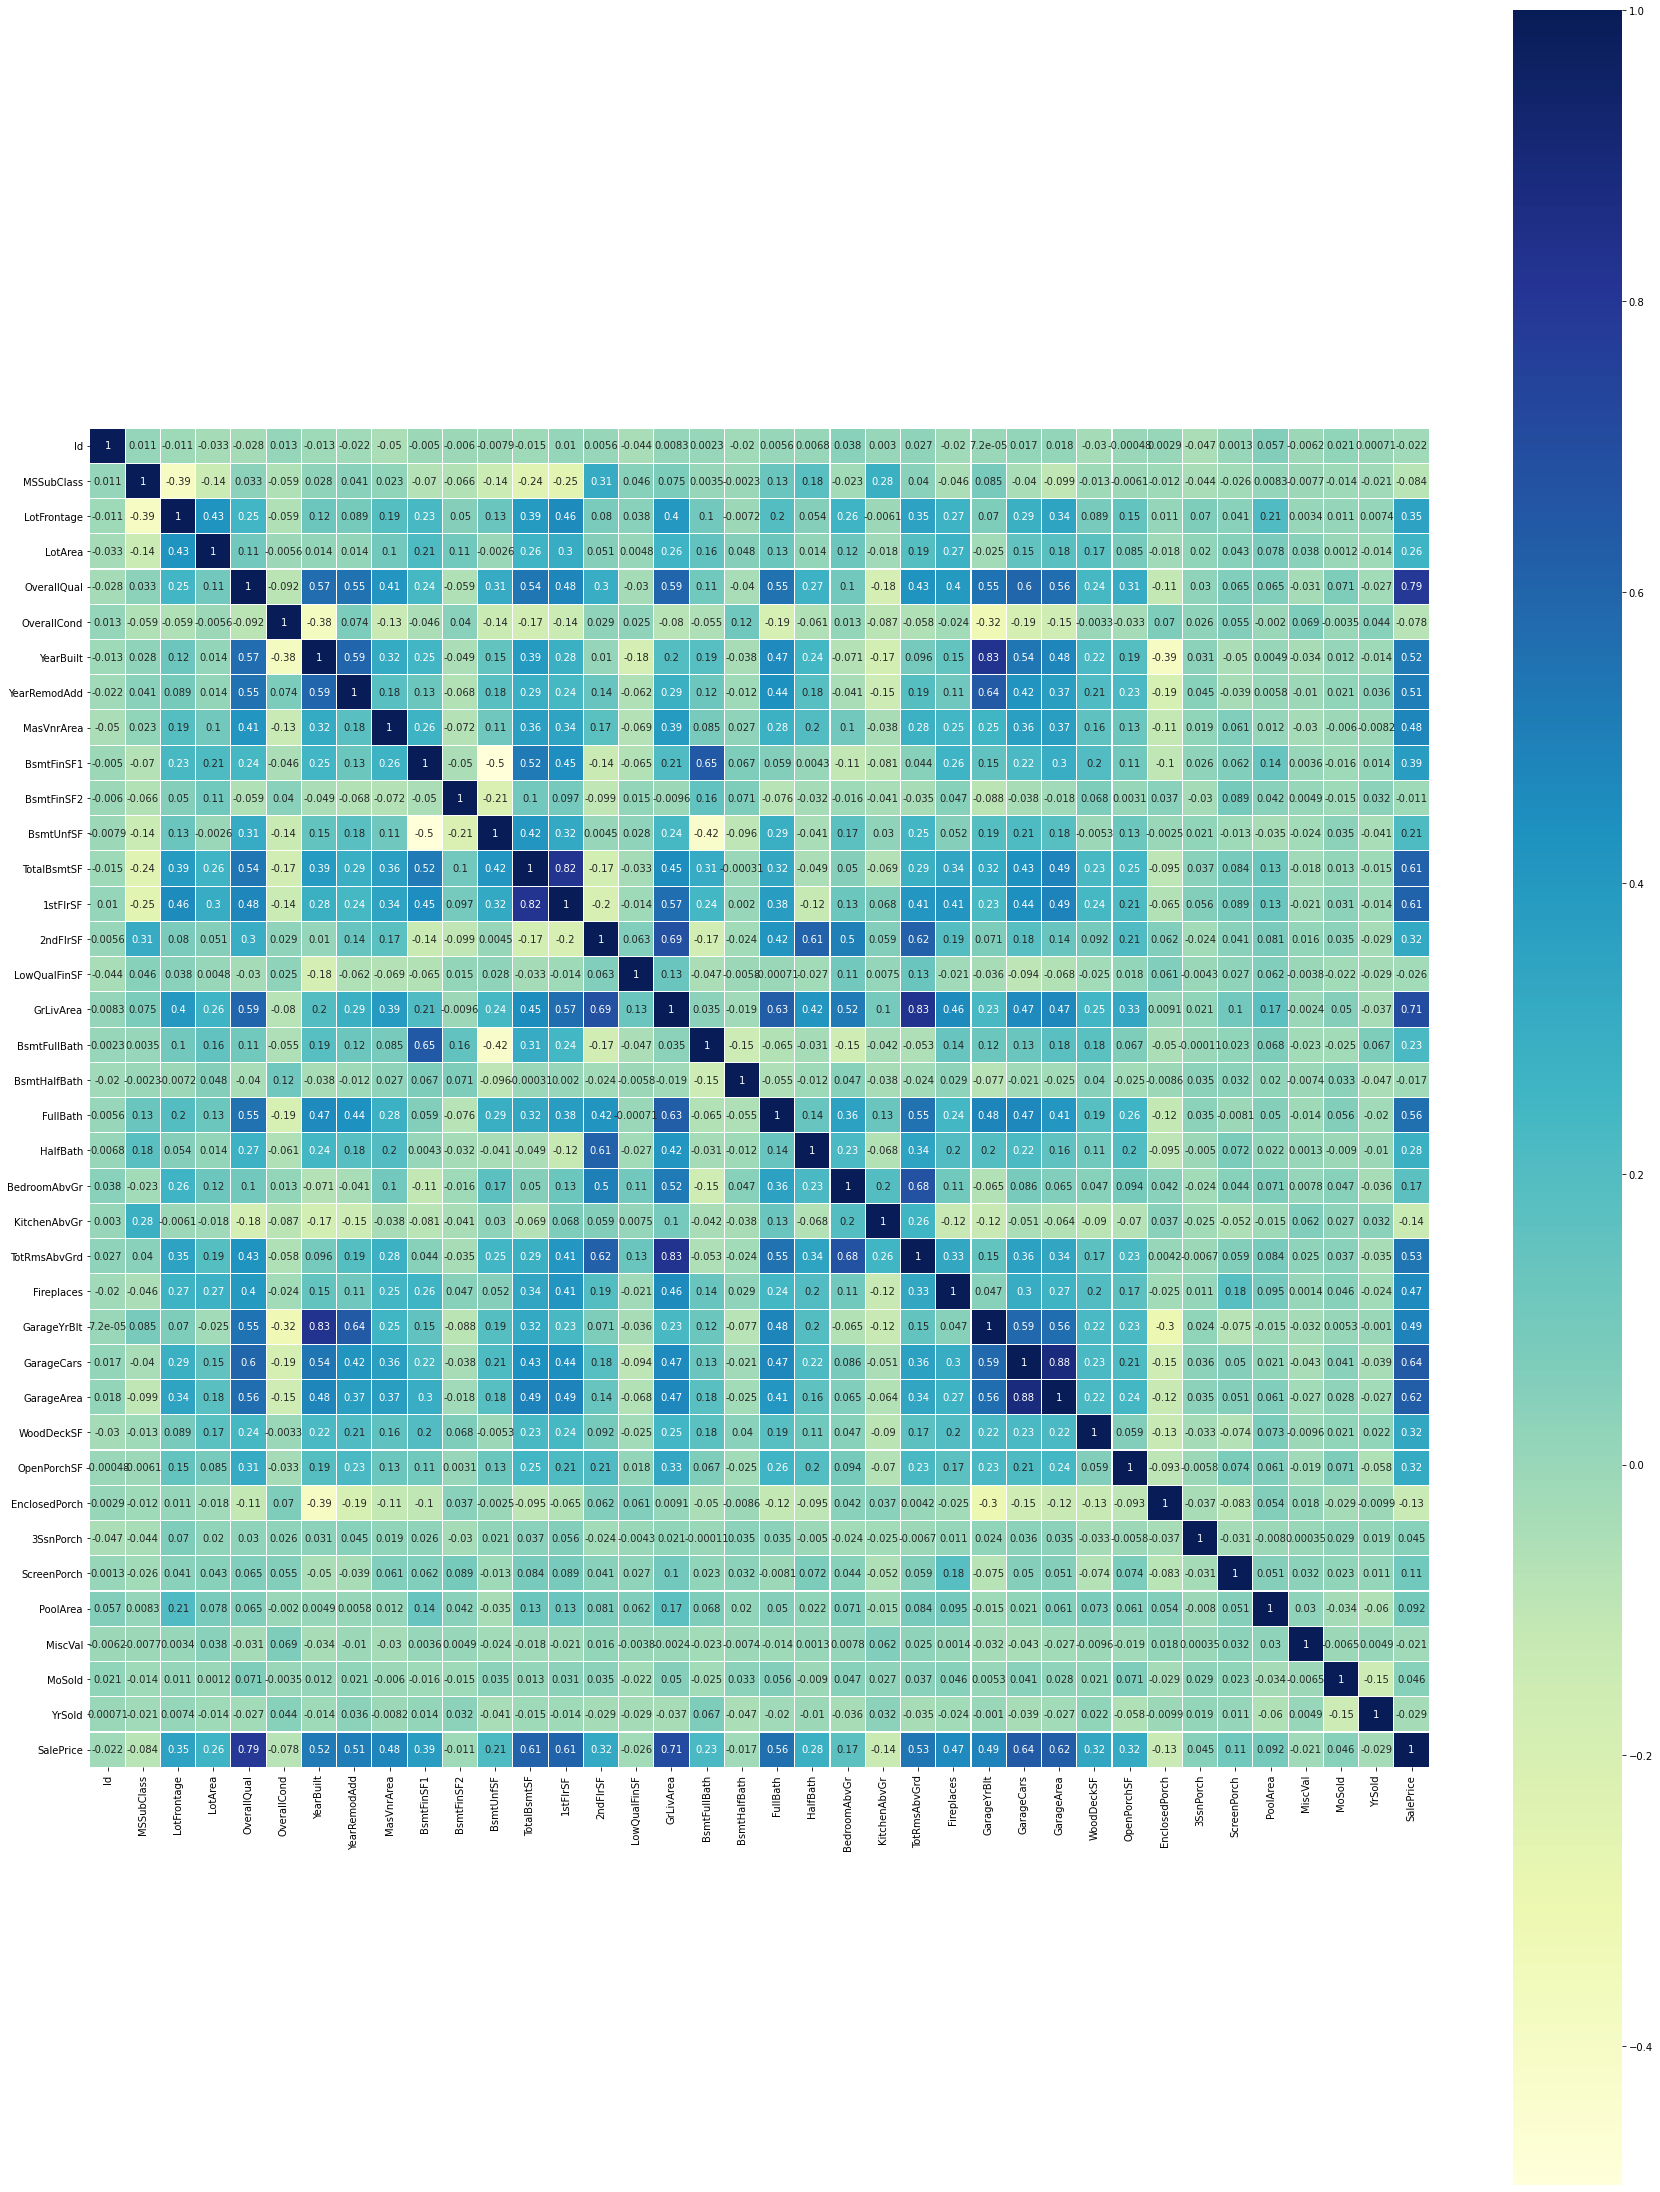

In [151]:
from matplotlib import pyplot as plt
import seaborn as sns
corrmat = df_train.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corrmat,annot=True,square=True,cmap="YlGnBu",linewidths=0.10,linecolor='white');

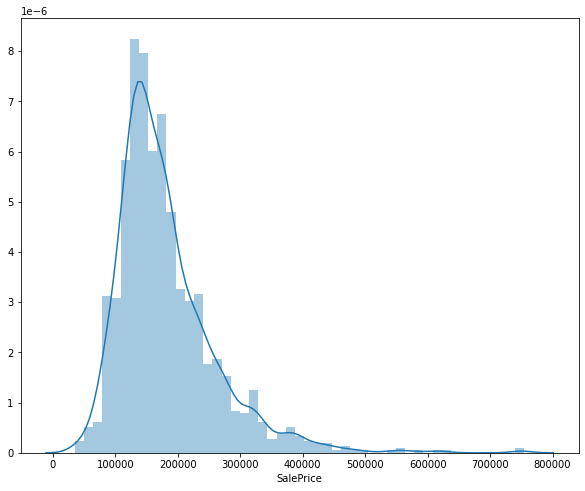

In [152]:
#Distribution of target variable
plt.figure(figsize=(10,8))
sns.distplot(df_train['SalePrice']);

<BarContainer object of 1460 artists>

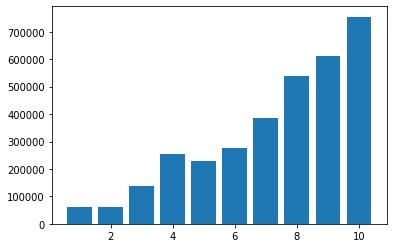

In [153]:
plt.bar(df_train["OverallQual"],df_train["SalePrice"])

<BarContainer object of 1460 artists>

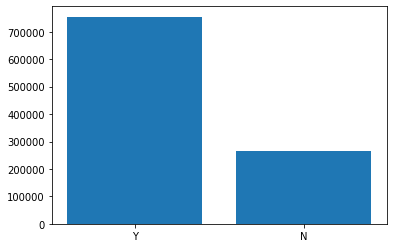

In [154]:
plt.bar(df_train["CentralAir"],df_train["SalePrice"])

<BarContainer object of 1460 artists>

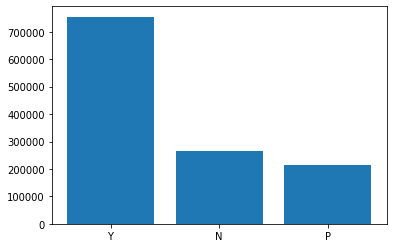

In [155]:
plt.bar(df_train["PavedDrive"],df_train["SalePrice"])

<BarContainer object of 1460 artists>

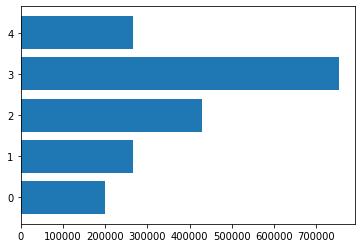

In [156]:
plt.barh(df_train["GarageCars"],df_train["SalePrice"])

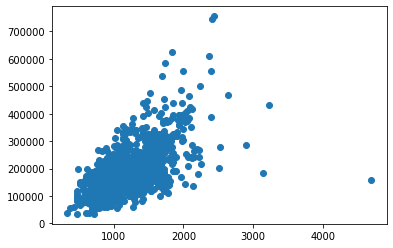

In [157]:
plt.scatter(df_train["1stFlrSF"],df_train["SalePrice"])

<BarContainer object of 1460 artists>

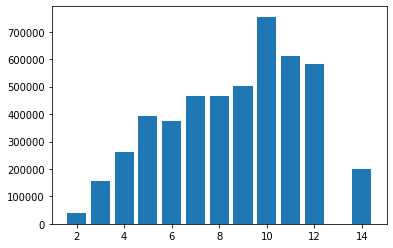

In [158]:
plt.bar(df_train["TotRmsAbvGrd"],df_train["SalePrice"])

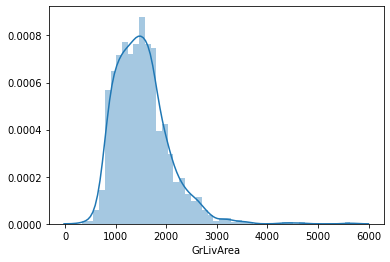

In [159]:
sns.distplot(df_train['GrLivArea'])

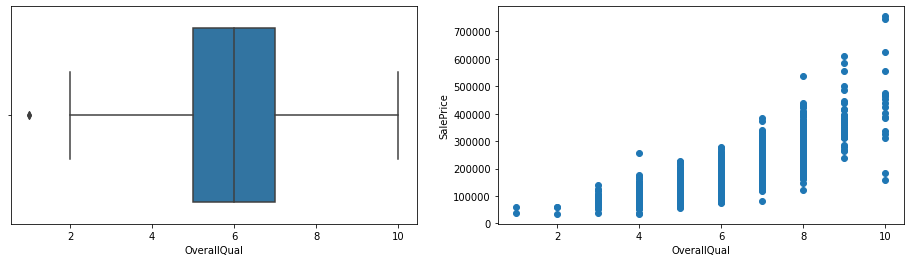

In [131]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(df_train['OverallQual'],ax=ax[0])
plt.scatter(df_train['OverallQual'],df_train['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

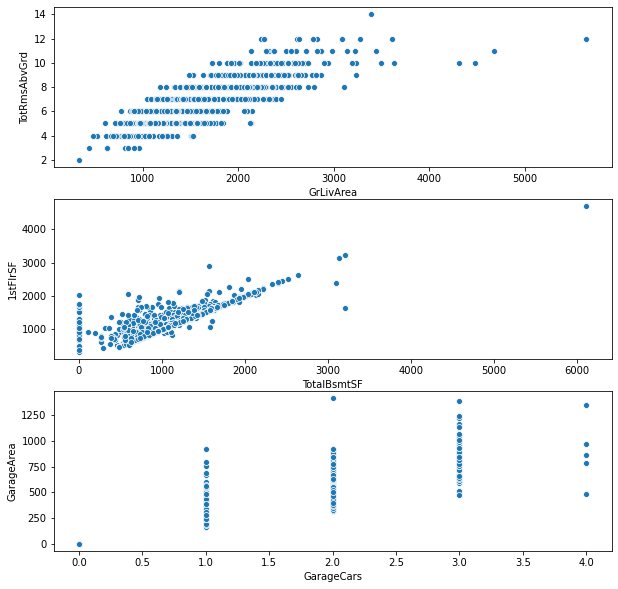

In [132]:
f,ax = plt.subplots(3,1,figsize=(10,10))
sns.scatterplot('GrLivArea','TotRmsAbvGrd',data=df_train,ax=ax[0])
sns.scatterplot('TotalBsmtSF','1stFlrSF',data=df_train,ax = ax[1])
sns.scatterplot('GarageCars','GarageArea',data=df_train,ax = ax[2])
plt.show()

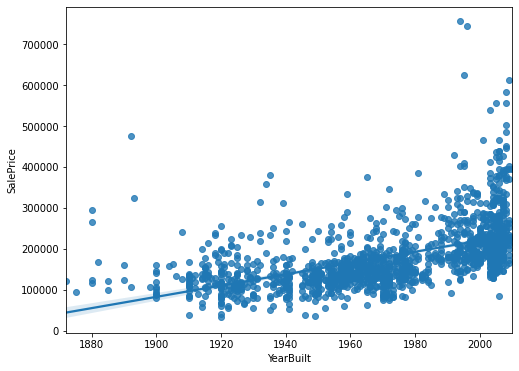

In [133]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='YearBuilt', y="SalePrice", data=data)

In [0]:
df1= df1.replace('None',0, regex=True)
train, test = df1[:len(df_train)], df1[len(df_train):]
X=train.drop(['Id','SalePrice'],axis=1)
Y=train['SalePrice']

In [0]:
test=test.drop(['Id','SalePrice'],axis=1)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg_lin=LinearRegression()
reg_lin.fit(X,Y)
pred=reg_lin.predict(test)

In [177]:
pred

array([110957.31384982, 161899.38454202, 166312.35060372, ...,
       167279.26545845, 125652.71927053, 237608.86759926])

In [178]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(reg_lin.predict(X), Y)

0.7804749021776364